## Given:  
model data of 34 species + ODE with 3 unknowns h_10_TPplus, h_10_TPminus, h_2

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

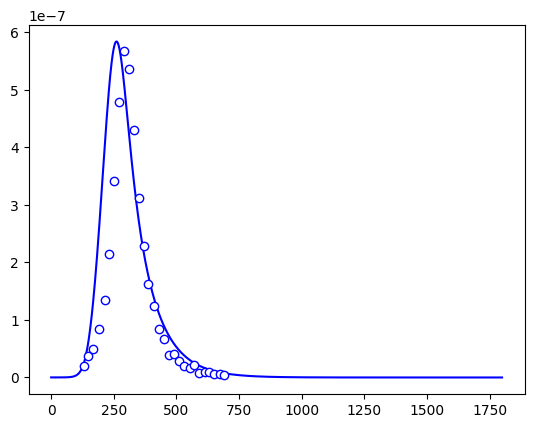

In [2]:
data = sio.loadmat("../../data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_1 = np.loadtxt("../../data/exp_data_case_3.dat").T
t_exp_1 = exp_data_1[0]
u_exp_1 = exp_data_1[1]

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
np.max(data["Y"], axis=0)

array([1.00000000e+00, 1.00000000e+00, 4.54258697e+00, 5.41050264e-01,
       1.29888545e-01, 1.00000000e+00, 1.00000000e-04, 8.99075842e+00,
       8.99157588e-04, 1.00000000e+00, 6.52850980e-04, 1.69286597e+01,
       2.63365081e+00, 1.00000000e+00, 1.19242711e-02, 1.35988619e+02,
       5.67362069e+01, 1.00000000e+00, 1.00010020e+00, 1.00000000e+00,
       1.00000000e-04, 9.98889639e-01, 9.96740400e-01, 7.49224388e-03,
       1.00000000e+00, 1.07688723e-04, 1.99890385e+00, 1.94999777e+00,
       1.96262243e+00, 1.00000000e+00, 1.00010002e+00, 1.00000000e+00,
       9.95287924e-01, 1.00000000e+00])

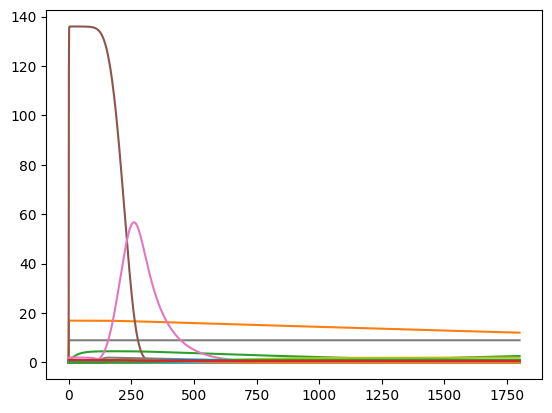

In [4]:
plt.plot(t_test * TIM, u_test)
plt.show()

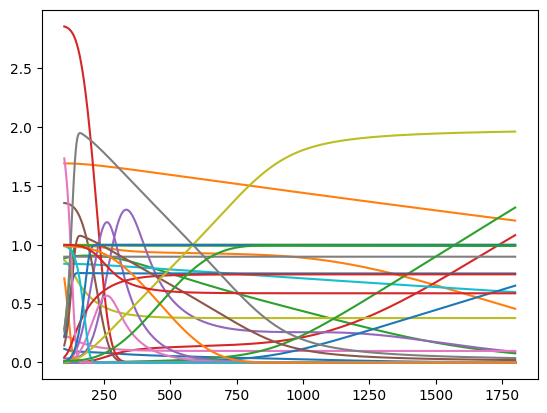

In [5]:
scale = np.array(
    [1, 1, 5, 0.5, 0.1, 1, 0.0000002, 10, 0.001, 0.005, \
     0.001, 10, 2, 0.01, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale

plt.plot(t_test[100:] * TIM, u_test[100:, :])
plt.show()

In [6]:
np.max(u_test[200:, :], axis=0)

array([8.75883084e-02, 9.91105323e-01, 9.08292047e-01, 1.08210053e+00,
       1.29888545e+00, 1.02684171e-03, 1.42825118e-01, 8.99075838e-01,
       5.50173769e-01, 8.33198516e-01, 6.52850980e-01, 1.68057769e+00,
       1.31682541e+00, 1.87905048e+00, 1.19242711e+00, 8.91785827e-01,
       5.67362069e-01, 1.66307787e-19, 1.00010000e+00, 1.10565860e-10,
       7.58821500e-01, 1.44967602e-06, 9.95009158e-01, 7.49224388e-01,
       1.13102402e-12, 1.04211453e+00, 2.04775731e-08, 1.88703118e+00,
       1.96262243e+00, 4.09845275e-02, 1.00010002e+00, 9.64315408e-01,
       9.95287924e-01, 9.50291844e-01])

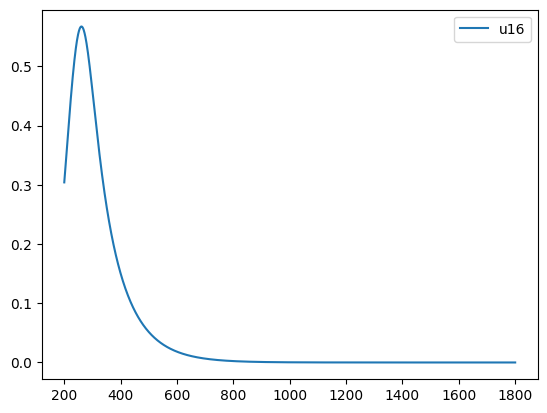

In [7]:
start = 200
# plt.plot(t_test[start:] * TIM, u_test[start:, 4], label='u4')
# plt.plot(t_test[start:] * TIM, u_test[start:, 6], label='u6')
# plt.plot(t_test[start:] * TIM, u_test[start:, 9], label='u9')
# plt.plot(t_test[start:] * TIM, u_test[start:, 10], label='u10')
# plt.plot(t_test[start:] * TIM, u_test[start:, 12], label='u12')
# plt.plot(t_test[start:] * TIM, u_test[start:, 13], label='u13')
# plt.plot(t_test[start:] * TIM, u_test[start:, 14], label='u14')
plt.plot(t_test[start:] * TIM, u_test[start:, 16], label='u16')
# plt.plot(t_test[start:] * TIM, u_test[start:, 18], label='u18')
# plt.plot(t_test[start:] * TIM, u_test[start:, 31], label='u31')
# plt.plot(t_test[start:] * TIM, u_test[start:, 32], label='u32')
# plt.plot(t_test[start:] * TIM, u_test[start:, 33], label='u33')
plt.legend()
plt.show()

In [8]:
t_train = t_test[200:][::20] # discard first 200 fluctuant points
u_train = u_test[200:][::20]
f_train = np.zeros_like(u_train)

model = models.PINN(TIM, NDM, scale, eps=1e-6)

In [9]:
loss = model.train(t_train, f_train, t_train, u_train, eps=1e-7, niter=400000)
# print total loss, data loss, ode loss, eq10_loss, eq14_loss, eq31_loss, eq32_loss, eq33_loss

0 3.3909924 3.33561 553824.2 5187714000.0 17693980000.0 29503.84 29602.936 265900.47
1000 0.17707658 0.08808238 889942.0 80676320.0 78135050.0 375548.25 375531.53 137274.1
2000 0.063765876 0.021630904 421349.75 18160032.0 1163545500.0 146190.9 146235.06 117106.7
3000 0.021176398 0.007248903 139274.94 41712684.0 696286700.0 38598.906 38644.47 54651.562
4000 0.014286278 0.0026268733 116594.04 1036861760.0 430634240.0 37724.57 37724.676 26469.828
5000 0.004861674 0.0016904423 31712.314 223065100.0 207280740.0 6804.2583 6812.7915 13791.809
6000 0.002897626 0.0011272557 17703.703 72140390.0 134262160.0 3988.5159 3994.4287 7656.734
7000 0.0018779661 0.0007944968 10834.692 26293274.0 76724120.0 2708.9895 2712.9678 4382.5615
8000 0.0012555155 0.0005364944 7190.21 25518324.0 46307210.0 1934.6921 1938.4717 2598.7905
9000 0.003404238 0.00036827655 30359.613 123638650.0 43475296.0 13571.248 13572.559 1544.6661
10000 0.0006418867 0.00031910356 3227.8315 7678250.5 23191284.0 990.97455 993.0516 935.1

86000 3.0917377e-06 3.0487067e-06 0.43031004 7487.4976 24710.709 0.050618738 0.05644342 0.0012658184
87000 1.3685569e-05 9.617135e-06 40.68434 3873852.5 132450.47 0.30535606 0.31467217 0.0012842567
88000 3.180518e-05 2.8435066e-05 33.701122 3042340.8 272434.0 0.27104977 0.28094023 0.0013861028
89000 4.6955454e-05 3.5222976e-05 117.32479 6198455.5 5422025.0 0.55736685 0.5613072 0.0013142313
90000 0.0005831226 0.0005770144 61.082073 5963002.5 79337.08 0.3233767 0.33427182 0.0010345234
91000 2.9843845e-06 2.88377e-06 1.0061442 63887.68 23427.182 0.063024156 0.068861865 0.001109609
92000 3.740668e-06 3.5878993e-06 1.5276874 124441.016 13296.338 0.07204589 0.07713538 0.0011325593
93000 1.5110268e-05 1.48597655e-05 2.505025 17210.047 216304.25 0.08045157 0.08826992 0.0011604556
94000 4.675761e-05 4.4126922e-05 26.306896 2073223.1 529726.3 0.13600455 0.14021161 0.0011864067
95000 2.6258515e-06 2.5990212e-06 0.26830304 2950.3662 2847.45 0.10159982 0.10761573 0.0011093159
96000 3.1317952e-06 2.

169000 2.111732e-06 1.9283982e-06 1.8333378 173109.86 3525.3535 0.033063054 0.0334377 0.00048495212
170000 4.931323e-06 3.7709083e-06 11.604149 1123098.6 26566.744 0.053054985 0.05395169 0.0004895032
171000 6.2048443e-06 5.794046e-06 4.1079826 181552.89 208294.44 0.10506477 0.1039631 0.00048112078
172000 9.487544e-06 9.459543e-06 0.28000796 21703.727 1740.0465 0.022518644 0.022591881 0.0004596897
173000 1.4103599e-06 1.3989234e-06 0.11436572 7302.773 1127.8428 0.014599675 0.015006022 0.00045386908
174000 2.0884758e-05 1.7122255e-05 37.625034 227235.19 3475268.8 0.29945457 0.3000792 0.00046352146
175000 2.7741303e-06 2.7231908e-06 0.5093951 35142.625 10810.111 0.024351014 0.02506604 0.0004506983
176000 1.4213681e-06 1.3852701e-06 0.36097917 14872.213 1137.367 0.09987427 0.100562505 0.00044658183
177000 1.3708451e-06 1.3575716e-06 0.1327349 6674.5054 1047.3694 0.027269652 0.027790511 0.00045598458
178000 1.9030391e-06 1.6577121e-06 2.4532697 228142.33 9876.527 0.035909418 0.03672424 0.00

251000 1.5713871e-06 1.5604621e-06 0.109250166 4273.9717 4521.081 0.010251437 0.01080854 0.00023966795
252000 4.4081116e-06 4.0587247e-06 3.4938715 344796.3 2117.9211 0.011930076 0.012556956 0.00024214118
253000 4.206581e-05 4.138909e-05 6.7672205 576002.06 81809.6 0.095151216 0.093711145 0.00024128986
254000 9.2857306e-07 9.2004404e-07 0.08528992 3809.254 859.7264 0.018933047 0.019434623 0.00023244345
255000 4.395629e-06 4.148984e-06 2.4664512 233473.11 7466.257 0.02780751 0.029017795 0.0002322285
256000 0.00010693585 0.000103315804 36.20041 3143712.2 367132.4 0.54614687 0.5455531 0.00025939074
257000 3.8008213e-06 3.6849924e-06 1.1582894 18528.957 94796.02 0.0123446975 0.012468108 0.00022690624
258000 9.02761e-07 8.9453476e-07 0.08226195 4968.958 984.7136 0.0110466005 0.0114503065 0.00022833019
259000 9.349507e-07 9.2649475e-07 0.084559865 5225.249 893.4556 0.011392958 0.011762842 0.00021702424
260000 1.8336217e-06 1.7855903e-06 0.48031396 6529.508 38380.39 0.0152440425 0.015754474 0

333000 8.9972735e-07 8.577939e-07 0.41933447 6046.291 34757.418 0.0054635536 0.0057220473 0.000111803034
334000 1.5117086e-05 1.20818595e-05 30.352266 1280639.6 1739357.0 0.075605854 0.076575376 0.00011981166
335000 0.0005877287 0.0005515363 361.92413 21318140.0 14608420.0 1.3418752 1.3148379 0.0018092695
336000 7.0553847e-07 6.896636e-07 0.15874904 7088.973 1198.1832 0.03767169 0.03810141 0.000104393876
337000 6.615971e-07 6.532406e-07 0.08356482 5893.8896 988.634 0.007158664 0.0074781915 0.000102730606
338000 6.74855e-07 6.657371e-07 0.091179386 6805.6807 1195.4807 0.005365769 0.0056947023 0.000107306594
339000 1.7483482e-06 1.7124736e-06 0.35874522 10617.673 23688.412 0.0076359725 0.007936104 0.00011227918
340000 2.7506676e-06 2.0756302e-06 6.7503753 12500.733 661251.1 0.0062176366 0.0065265233 0.00011246808
341000 8.090042e-07 7.973141e-07 0.11690082 6898.841 3016.1028 0.008664666 0.008976479 0.000110228255
342000 2.597025e-06 2.1974413e-06 3.9958382 384691.7 12585.402 0.011407238 

In [10]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

In [11]:
# plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] * scale[14] + u_pred[:, 16] * NDM[16] * scale[16]) * 1e-9, '--', label='Model(No Inh)')
# plt.plot(t_train * TIM, (u_train[:, 14] * NDM[14] * scale[14] + u_train[:, 16] * NDM[16] * scale[16]) * 1e-9, label='Model(No Inh)')
# plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
# plt.show()

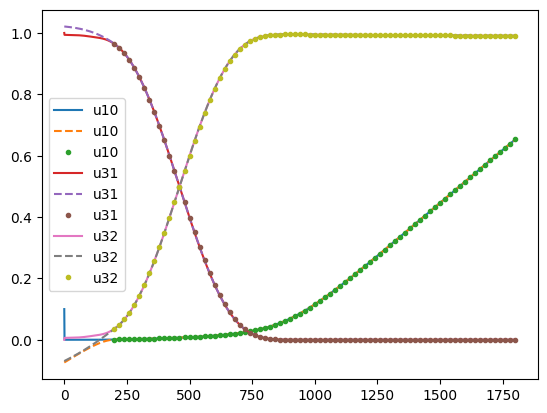

In [12]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_pred[:, 10], '--', label='u10')
plt.plot(t_train * TIM, u_train[:, 10], '.', label='u10')
# plt.plot(t_test * TIM, u_test[:, 18], label='u18')
# plt.plot(t_test * TIM, u_pred[:, 18], '--', label='u18')
# plt.plot(t_train * TIM, u_train[:, 18], '.', label='u18')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_pred[:, 31], '--', label='u31')
plt.plot(t_train * TIM, u_train[:, 31], '.', label='u31')
plt.plot(t_test * TIM, u_test[:, 32], label='u32')
plt.plot(t_test * TIM, u_pred[:, 32], '--', label='u32')
plt.plot(t_train * TIM, u_train[:, 32], '.', label='u32')
plt.legend()
plt.show()

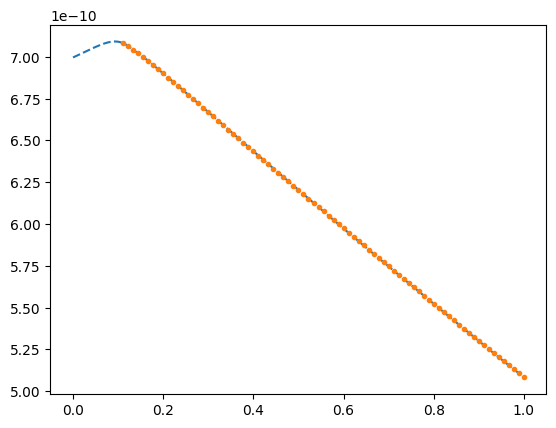

In [17]:
j = 9
plt.plot(t_test, u_pred[:, j] * NDM[j] * scale[j] * 1e-9, '--')
plt.plot(t_train, u_train[:, j] * NDM[j] * scale[j] * 1e-9, ".")
plt.show()

In [32]:
# plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * scale[16] * 1e-9, '--')
# plt.plot(t_train * TIM, u_train[:, 16] * NDM[16] * scale[16] * 1e-9)
# plt.show()

In [18]:
# h_10_TPplush_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
print("h_10_TPminus:",  tf.math.exp(model.log_h_10_TPminus).numpy())
print("h_2:", tf.math.exp(model.log_h_2).numpy())

h_10_TPplus: 4.241082
h_10_TPminus: 7.894202e-06
h_2: 0.00017882469
